## Comparison of the best augmentations on 50 epochs, whole dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import trapz
from IPython.display import display

#### Import csv files and make the dfs

In [2]:
df_2_random_color =  pd.read_csv('./3b_best_augs/3b_GTA5_to_CITY_augmented_color_2_random_tranforms_color_100_percent.csv')
df_2_random_color_or_all_best_weather = pd.read_csv('./3b_best_augs/3b_GTA5_to_CITY_augmented_color_2_random_tranform_color_OR_ALL_g_h_i_100_percent.csv')

In [3]:
val_miou_2_random_color = df_2_random_color['val_mIoU']
val_miou_2_random_color_or_all_best_weather = df_2_random_color_or_all_best_weather['val_mIoU']

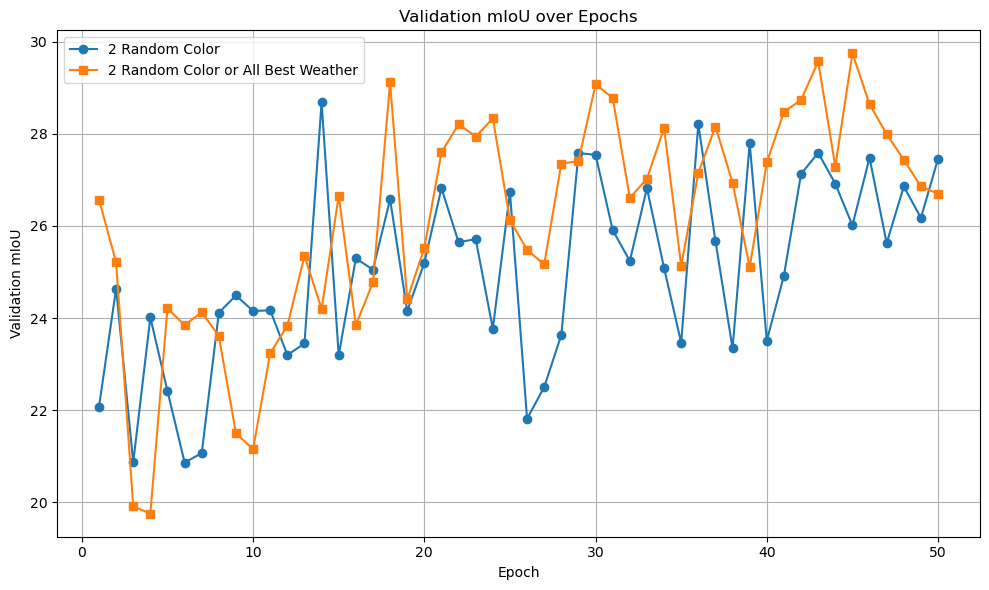

In [4]:


# Estrai e inverte le metriche per avere l'ordine epoche crescente
val_miou_2_random_color = df_2_random_color['val_mIoU'][::-1].reset_index(drop=True)
val_miou_2_random_color_or_all_best_weather = df_2_random_color_or_all_best_weather['val_mIoU'][::-1].reset_index(drop=True)

# Crea un asse delle epoche corretto (da 1 a 50)
epochs = range(1, len(val_miou_2_random_color) + 1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_miou_2_random_color, label='2 Random Color', marker='o')
plt.plot(epochs, val_miou_2_random_color_or_all_best_weather, label='2 Random Color or All Best Weather', marker='s')

plt.title('Validation mIoU over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation mIoU')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:

# Inverti i valori per epoche crescenti
val_miou_1 = df_2_random_color['val_mIoU'][::-1].reset_index(drop=True)
val_miou_2 = df_2_random_color_or_all_best_weather['val_mIoU'][::-1].reset_index(drop=True)

threshold = 25  # soglia più sensata per val_mIoU

df_summary = pd.DataFrame({
    'Mean': [val_miou_1.mean(), val_miou_2.mean()],
    'Max': [val_miou_1.max(), val_miou_2.max()],
    'Min': [val_miou_1.min(), val_miou_2.min()],
    'Std': [val_miou_1.std(), val_miou_2.std()],
    'Best Epoch': [val_miou_1.idxmax() + 1, val_miou_2.idxmax() + 1],
    'AUC': [trapz(val_miou_1), trapz(val_miou_2)],
    f'Epochs > {threshold}': [(val_miou_1 > threshold).sum(), (val_miou_2 > threshold).sum()],
    'Trend': [
        np.polyfit(range(len(val_miou_1)), val_miou_1, 1)[0],
        np.polyfit(range(len(val_miou_2)), val_miou_2, 1)[0]
    ],
    'Final Epoch mIoU': [val_miou_1.iloc[-1], val_miou_2.iloc[-1]]
}, index=[
    '2 Random Color',
    '2 Random Color or All Best Weather'
])

df_summary = df_summary.round(4)

def underline_best(s):
    return ['text-decoration: underline; font-weight: bold;' if v else '' for v in s]

styled_df = df_summary.style.set_caption("📊 Validation mIoU Summary Table") \
    .format(precision=4) \
    .set_table_styles([
        {'selector': 'caption', 'props': [('text-align', 'left'), ('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', 'white'), ('font-weight', 'bold'), ('color', 'black')]},
        {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
    ]) \
    .apply(lambda x: underline_best(x == x.max()), subset=['Mean', 'Max', 'Best Epoch', 'AUC', f'Epochs > {threshold}', 'Final Epoch mIoU', 'Trend']) \
    .apply(lambda x: underline_best(x == x.min()), subset=['Min', 'Std'])

display(styled_df)

,Mean,Max,Min,Std,Best Epoch,AUC,Epochs > 25,Trend,Final Epoch mIoU
2 Random Color,25.0120,28.6817,20.8643,2.0093,14,1225.8392,27,0.0799,27.4574
2 Random Color or All Best Weather,26.1068,29.7450,19.7537,2.4047,45,1278.7056,36,0.1145,26.6987


#### Comments:
- The best one seems to be '2 Random Color or All Best Weather', since it has an overall higher mean, more epochs > 25, a higher AUC and a higher trend. 
- On the other hand, '2 Random Color' has a higher min valye, lower std and a higher Final Epoc mIoU, but overaal the other combiantion generally achieves better values and has a better trend.
- I SUGGEST WE CHOOSE '2 Random Color or All Best Weather' BETWEEN THESE 2.

## Metrics Explanation

| Column         | Description |
|----------------|-------------|
| **Mean**       | The average validation mIoU across all epochs. Gives a general sense of model performance over time. |
| **Max**        | The highest mIoU achieved during validation. Indicates peak performance. |
| **Min**        | The lowest mIoU recorded. Useful to assess consistency and worst-case performance. |
| **Std**        | The standard deviation of mIoU values. A lower value means the model is more stable across epochs. |
| **Best Epoch** | The epoch number (1-based) where the highest mIoU was achieved. |
| **AUC**        | The Area Under the Curve of the mIoU trend. A higher value reflects better performance over the full validation period. |
| **Epochs > 25** | Number of epochs where mIoU exceeded a threshold of 25. Useful to evaluate how consistently good the model is. |
| **Trend**      | The slope of a linear fit over all epochs. A positive value suggests performance is improving, while a negative one indicates degradation. |
